<a href="https://colab.research.google.com/github/BrittonWinterrose/HN-Data-Science/blob/master/Visualizing_Saltiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Saltiness? 

According to Urban Dictionary: 

**Being salty is when you are upset over something little.**

***"He was so salty after he died in smash bros"***

It is manifest in negative speech, particularly *subjective* negative speech. 

## We'll take a look with some fake data first

In [0]:
#!pip install --upgrade pandas
#!pip install --upgrade numpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Visuallize all the the negative or positive statements
# Show how it looks when they're binned. 

# Create Normal Random Data
samples = 3000
a = np.random.uniform(low=-1.0, high=1.0, size=samples)
b = np.random.uniform(low=0.0, high=1.0, size=samples)
c = a*b
d = np.random.uniform(low=-1.0, high=1.0, size=samples)
f = np.full(samples, 'polarity')
g = np.full(samples, 'saltiness')
values = np.append(a, c)
const = np.append(b, b)
labels = np.append(f,g)
df = pd.DataFrame({'values':values, 'type':labels, 'subjectivity': const})

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

## Here's a mock graph of the comments' Polarity vs Subjectivity would look like.


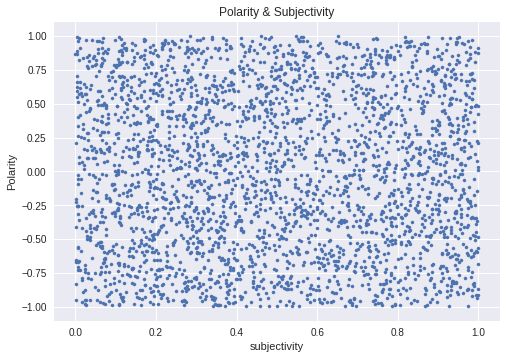

In [0]:
plt.scatter(b, a, s=10) # Polarity / Subjectivity
plt.xlabel('subjectivity')
plt.ylabel('Polarity')
plt.title('Polarity & Subjectivity')
plt.grid(True)
plt.savefig("test.png")
plt.show()

## Now plotted as a distribution: 

You'll notice that there is a pretty even distribution of the data. 

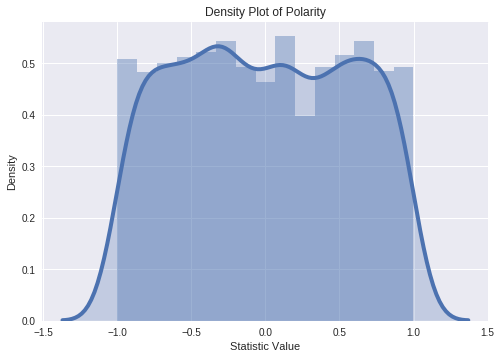

In [0]:
# Create a subset of just polarity. 
subset = df[df['type'] == 'polarity']

# Plot the distributions to see how the data is distributed. 
sns.distplot(subset['values'], hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 4}, 
                      label = 'polarity')

# Plot formatting
#plt.legend(prop={'size': 16}, title = 'Metric')
plt.title('Density Plot of Polarity')
plt.xlabel("Statistic Value")
plt.ylabel('Density');



## But now watch what happens when I use Subjectivity as a  filter. 



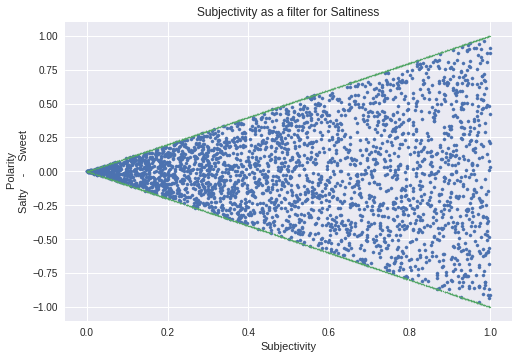

In [0]:
plt.scatter(b, c, s=10) # Saltinessss
plt.scatter(np.absolute(d), d, s=1) # Boundary
plt.xlabel('Subjectivity')
plt.ylabel('     Polarity    \nSalty    -    Sweet')
plt.title('Subjectivity as a filter for Saltiness')
plt.grid(True)
plt.savefig("test.png")
plt.show()

## Lets look at Saltiness compared to polarity now

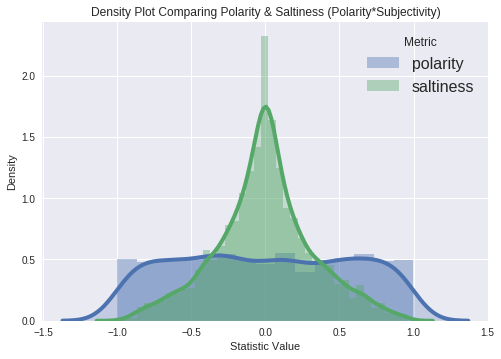

In [0]:
# List of labels to compare
compare = ['polarity', 'saltiness']

# Iterate through the columns
for i in compare:
    # Subset to the airline
    subset = df[df['type'] == i]
    
    # Plot the two distributions to see the difference. 
    sns.distplot(subset['values'], hist = True, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 4}, 
                      label = i)

# Plot formatting
plt.legend(prop={'size': 16}, title = 'Metric')
plt.title('Density Plot Comparing Polarity & Saltiness (Polarity*Subjectivity)')
plt.xlabel("Statistic Value")
plt.ylabel('Density');

Using subjectivity as a filter pulled more of our data toward the "normal" center, leaving the most highly charged, subjective comments on the extremes. 

This means we would be less likely to falsely categorize critical negative speech (negative speech, but based in fact ). 

This means the results we get should be **really salty**.


# So it works great on random data! But what about real data? 


In [0]:
# Import a sample of 100000 rows from our real dataset. 
df2 = pd.read_pickle('polarity_salty_compare.pkl')

## I imported a sample of 100,000 / 15,397,309 comments

In [0]:
df2.head()

,comment_polarity,comment_saltiness,comment_subjectivity,is_subjective,is_negative,is_salty,quadrant
9275683,0.200000,0.060000,0.300000,False,False,False,pos_obj
4244063,0.466667,0.311111,0.666667,True,False,False,pos_sub
2338075,0.056944,0.023521,0.413056,False,False,False,pos_obj
3893288,0.236667,0.128983,0.545000,True,False,False,pos_sub
5106303,0.000000,0.000000,0.200000,False,False,False,pos_obj


In [0]:
df2.shape

(100000, 7)

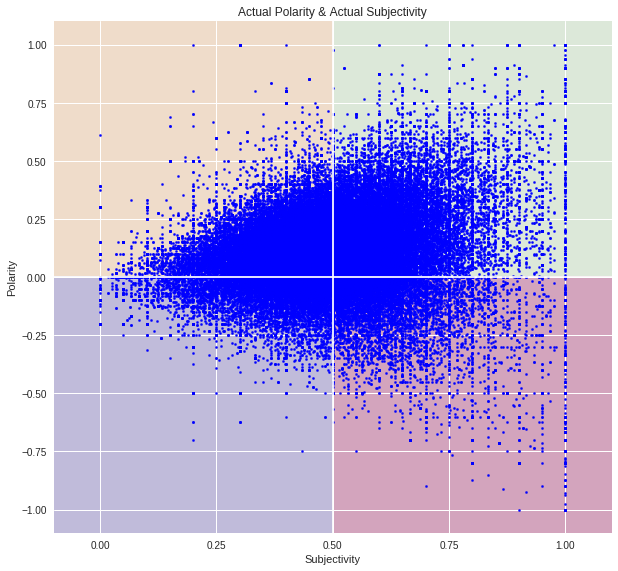

In [0]:
# Polarity / Subjectivity
# Actual Data
arr = np.array([[2,3],[4,1]])

fig, ax = plt.subplots(1,1,figsize=(10, 10))
ax.imshow(arr, extent=[-0.1,1.1, -1.1, 1.1], cmap=plt.cm.Spectral, interpolation='none', alpha=.3)

ax.set_aspect(.5, adjustable=None, anchor="C", share=False)
ax.scatter(df2['comment_subjectivity'], df2['comment_polarity'], s=5, color='blue')
ax.set_xticks([0,.25,.5,.75,1])
ax.axhline(0, color='white')
ax.axvline(0.5, color='white')
ax.set_xlabel('Subjectivity')
ax.set_ylabel('Polarity')
ax.set_title('Actual Polarity & Actual Subjectivity')
ax.grid(True)
plt.show()

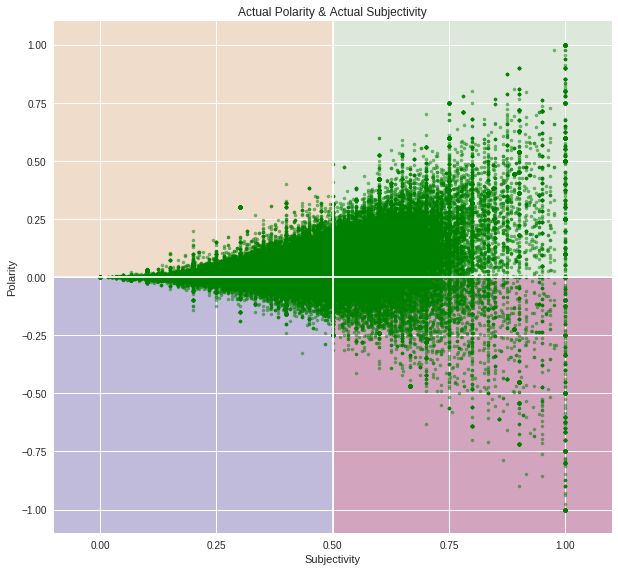

In [0]:
# Saltiness / Subjectivity
# Actual Data
arr = np.array([[2,3],[4,1]])

fig, ax = plt.subplots(1,1,figsize=(10, 10))
ax.imshow(arr, extent=[-0.1,1.1, -1.1, 1.1], cmap=plt.cm.Spectral, interpolation='none', alpha=.3)

ax.set_aspect(.5, adjustable=None, anchor="C", share=False)
ax.scatter(df2['comment_subjectivity'], df2['comment_saltiness'], s=10,color='green', alpha=.5)
ax.set_xticks([0,.25,.5,.75,1])
ax.axhline(0, color='white')
ax.axvline(0.5, color='white')
ax.set_xlabel('Subjectivity')
ax.set_ylabel('Polarity')
ax.set_title('Actual Polarity & Actual Subjectivity')
ax.grid(True)
plt.show()

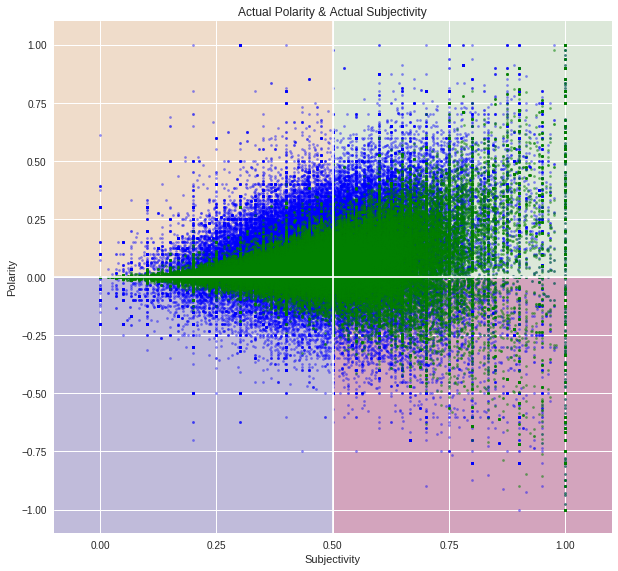

In [0]:
# Polarity / Subjectivity
# Actual Data
arr = np.array([[2,3],[4,1]])

fig, ax = plt.subplots(1,1,figsize=(10, 10))
ax.imshow(arr, extent=[-0.1,1.1, -1.1, 1.1], cmap=plt.cm.Spectral, interpolation='none', alpha=.3)

ax.set_aspect(.5, adjustable=None, anchor="C", share=False)
ax.scatter(df2['comment_subjectivity'], df2['comment_polarity'], s=5, color='blue', alpha=.45)
ax.scatter(df2['comment_subjectivity'], df2['comment_saltiness'], s=5, color = "green",alpha=.55)
ax.set_xticks([0,.25,.5,.75,1])
ax.axhline(0, color='white')
ax.axvline(0.5, color='white')
ax.set_xlabel('Subjectivity')
ax.set_ylabel('Polarity')
ax.set_title('Actual Polarity & Actual Subjectivity')
ax.grid(True)
plt.show()

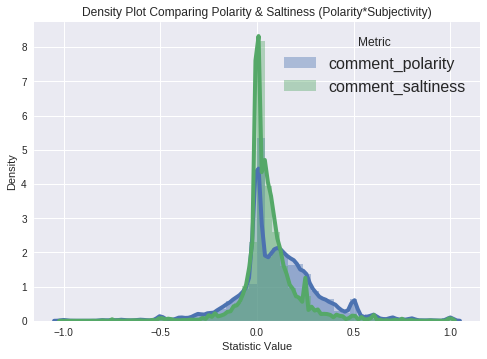

In [0]:
# List of labels to compare
compare = ['comment_polarity', 'comment_saltiness']

# Iterate through the columns
for i in compare:
    # Plot the two distributions to see the difference. 
    sns.distplot(df2[[i]], hist = True, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 4}, 
                      label = i)

# Plot formatting
plt.legend(prop={'size': 16}, title = 'Metric')
plt.title('Density Plot Comparing Polarity & Saltiness (Polarity*Subjectivity)')
plt.xlabel("Statistic Value")
plt.ylabel('Density');